In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as ma
from scipy import integrate

#### Définition des potentiels qu'on utilisera 

On définie la taille de notre système 


In [2]:
N=2000
xmin=3.5
xmax=7.5 
h= ( xmax - xmin )/N
x=np.linspace(xmin,xmax, N)


In [3]:



# born pot 

#binf, bsup= float(input ('valeur de la born inf de V')) , float(input ('valeur de la borne sup de V')) 
def Barriere(x):
    
    # on def les bornes du pot 
    xmin=3.5
    xmax=7.5  
    binf=4
    bsup=7

    V=[]
    
    for i in range(len(x)):
        
        if (x[i] <= binf or x[i] >= bsup):
        
            V.append(0)
            
        else:
            
            V.append(10)
    return V




def V(x):
    
    # on def les bornes du pot 
    xmin=3.5
    xmax=7.5  
    binf=4
    bsup=7

    V=[]
    
    for i in range(len(x)):
        
        if (x[i] <= binf or x[i] >= bsup):
        
            V.append(0)
            
        else:
            
            V.append(-10)
    
    
    ## def des matchings points
    
    for i in range(len(V)):
        
        if (V[i]!= 0):
            
            L=i 
            
            break 
      
    for i in range(len(V)-1,0,-1):
        
        if (V[i]!= 0):
            
            R=i 
            
            break 
        
    MP=[L,R] 
    
    return V, MP  ## return un vecteur 2D ## de  valeur L ou R  


print(V(x)[1][0], V(x)[1][1], len(V(x)[0])  )

250 1749 2000


In [4]:
def VQuad(x):
    
    # on def les bornes du pot 
    xmin=3.5
    xmax=7.5  
    binf=4
    bsup=7

    V=[]
    
    Delta= (bsup-binf)/ 2
    E= (bsup+binf)/ 2
    
    
    for i in range(len(x)):
        
        if (x[i] < binf or x[i] > bsup):
        
            V.append(0)
            
        else:
            
            V.append( -10*( 1-  ((x[i]-E)/Delta)**2 ) ) 
    
    
    ## def des matchings points
    
    MP= len(V)/2
        
     
    
    return V, MP  ## return un vecteur 2D ## de valeur L ou R  


In [5]:
xmin=3.5
xmax=7.5  
r=np.linspace(xmin,xmax, N)


def VLJ(x, sigma , Vo):
    
    xmin=3.5
    xmax=7.5
    
    
    V=[]

    for i in range(len(x)):
       
    
            V.append(48*Vo*np.power(sigma, 12)/np.power(x[i], 13) - 24 *Vo*np.power(sigma,6) /np.power(x[i], 7))  
    
    
    
    return V  ## return un vecteur 2D ## de valeur L ou R 



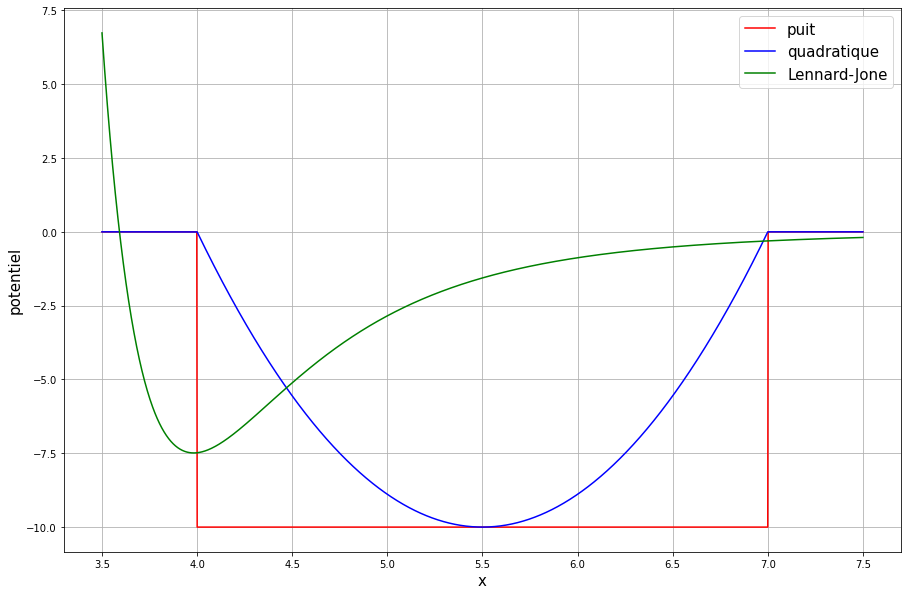

In [6]:
#E=  -1.82 #2*(10*m.pi/30)**2


plt.figure(figsize=(15,10))
plt.xlabel('x', fontsize=15)   
plt.ylabel('potentiel',fontsize=15 )

plt.grid()


plt.plot(x,V(x)[0],  c="r", label='puit')
plt.plot(x,VQuad(x)[0],  c="b", label='quadratique')
plt.plot(r,VLJ(r, 3.2, 10),  c="g", label='Lennard-Jone')


plt.legend(fontsize= 15)
plt.show()   


#### définition de numérov gauche et droit 

In [7]:
def numerovL(h,V,E,MP): ## MP est le matching point L ou R en fonction de ce que l'on veux  
    
    hbar= 1# 6.62607015*10**(-34) / 2*(ma.pi) ## constante de planck 
    m= 1
    
    J=[]  ## = 2*(e-v(x))
    for i in range(len(V)):

        J.append(2*m*(E-V[i]/ hbar**2 ) )

    f=np.zeros(len(J))
    f[0]=0
    f[1]= 0.001 #h*np.sqrt(abs( V[0] ) )*np.exp( np.sqrt(abs( V[0] ))*x[0])
    
    for i in range(1,len(J)-1):
        
        f[i+1] = ((2 - 5 * h ** 2 / 6 * J[i]) * f[i] - (1 + h ** 2 / 12 * J[i-1]) * f[i-1]) / (1 + h ** 2 / 12 * J[i+1])
       
    fprimL= (f[MP+1] - f[MP-1]) /(2*h)
    
    return f, fprimL 

In [8]:
def numerovR(h,V,E,MP): 
    
    hbar= 1# 6.62607015*10**(-34) / 2*(ma.pi) ## constante de planck 
    m= 1
    
    J=[]  ## = 2*(e-v(x))
    for i in range(len(V)):

        J.append(2*m*(E-V[i]/ hbar**2 ) )

    f=np.zeros(len(J))
    f[len(J)-1]=0
    f[len(J)-2]= 0.001 #h*np.sqrt(abs( V[0] ) )*np.exp( np.sqrt(abs( V[0] ))*x[0])
    
    for i in range(len(J)-2,0,-1):
        
        f[i-1] = ((2 - 5 * h ** 2 / 6 * J[i]) * f[i] - (1 + h ** 2 / 12 * J[i+1]) * f[i+1]) / (1 + h ** 2 / 12 * J[i-1])
    
    
    fprimR = (f[MP+1] - f[MP-1]) /(2*h)    
        
    return f , fprimR

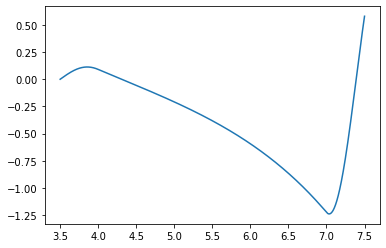

In [9]:
#teste avec une barrière de potentiel 


#plt.plot(x,Barriere(x))
plt.plot(x ,numerovL(h,Barriere(x),9.8, 0)[0] )

#### Application de la méthode des matchings points pour obtenir nos modes 

- on va utiliser une technique d'itération qui permet de zoomer pour obtenir des valeurs de l'énergie de plus en plus précise. On fait ceci dans l'objectif  d'avoir la valeur d'énergie la plus précise pour décrire le mieux possible le comportement de la fonction d'onde par la méthode numérov 
- Le but pour réaliser ceci est de miminiser dériver sur fonction au matching point pour numérov gauche et droit 

In [10]:
def AMP(V,h, MP):

    if (min(V) == max(V)):  ## particule dans une boite 
        E_test = np.linspace(min(V),10,1000)
    else:           
        E_test = np.linspace(min(V),max(V),5000)  ## Plus le nombre de point est élevés plus on aura de mode en sortie 
       
    E_solution = []  ## reset e_solution
    
    for k in range(1,2):
         
        
        if k==1: 
    
            for j in range(len(E_test)):

                numL= numerovL(h,V,E_test[j],MP)
                numR= numerovR(h,V,E_test[j],MP)

                if round(  numL[1]/numL[0][int(MP)], k) - round(numR[1]/numR[0][int(MP)], k) == 0 :  
                    E_solution.append(E_test[j])
        
        else: 
            
            for i in range(len(E_solution)):

                E_test=np.linspace(E_solution[i]-round(E_solution[i],k) ,E_solution[i]+round(E_solution[i],k), 1000 )

                for j in range(len(E_test)):

                    numL= numerovL(h,V,E_test[j],MP)
                    numR= numerovR(h,V,E_test[j],MP)


                    if round(numL[1]/numL[0][int(MP)], k+1) - round(numR[1]/numR[0][int(MP)], k+1) == 0 :  
                            #E_solution[i]=0
                            E_solution[i]=E_test[j]


            

                
        
    return E_solution
    
    
    
    
    
    
    
    

#### Puit

In [11]:
H=AMP(V(x)[0], h, V(x)[1][0] )
H


[-9.581916383276655,
 -8.339667933586718,
 -8.337667533506702,
 -6.299259851970394,
 -6.297259451890378,
 -6.295259051810362,
 -6.293258651730346,
 -6.29125825165033,
 -3.4986997399479893,
 -3.4966993398679733,
 -3.4946989397879573,
 -3.4926985397079413,
 -3.4906981396279253,
 -3.4886977395479093,
 -3.4866973394678933,
 -3.4846969393878773,
 -3.4826965393078613,
 -0.016003200640128057,
 -0.01400280056011205,
 -0.012002400480096043,
 -0.010002000400080036,
 -0.008001600320064028,
 -0.006001200240048021,
 -0.004000800160032014,
 -0.002000400080016007,
 0.0]

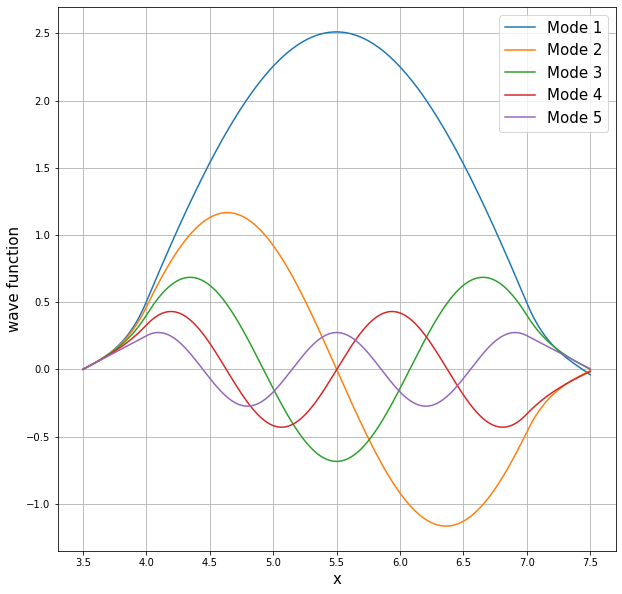

In [22]:
plt.figure(figsize=(10,10))
plt.xlabel('x', fontsize=15)   
plt.ylabel('wave function',fontsize=15 )
plt.grid()

plt.plot(x,numerovL(h,V(x)[0],H[0],V(x)[1][0])[0], label='Mode 1'  )
plt.plot(x,numerovL(h,V(x)[0],H[1],V(x)[1][0])[0], label='Mode 2' )
plt.plot(x,numerovL(h,V(x)[0],H[7],V(x)[1][0])[0], label='Mode 3' )
plt.plot(x,numerovL(h,V(x)[0],H[8],V(x)[1][0])[0], label='Mode 4' )
plt.plot(x,numerovL(h,V(x)[0],H[17],V(x)[1][0])[0], label='Mode 5' )



plt.legend(fontsize= 15)
plt.show()   

In [23]:
C=AMP(V(x)[0], h, V(x)[1][0] )

In [24]:
C

[-9.581916383276655,
 -8.339667933586718,
 -8.337667533506702,
 -6.299259851970394,
 -6.297259451890378,
 -6.295259051810362,
 -6.293258651730346,
 -6.29125825165033,
 -3.4986997399479893,
 -3.4966993398679733,
 -3.4946989397879573,
 -3.4926985397079413,
 -3.4906981396279253,
 -3.4886977395479093,
 -3.4866973394678933,
 -3.4846969393878773,
 -3.4826965393078613,
 -0.016003200640128057,
 -0.01400280056011205,
 -0.012002400480096043,
 -0.010002000400080036,
 -0.008001600320064028,
 -0.006001200240048021,
 -0.004000800160032014,
 -0.002000400080016007,
 0.0]

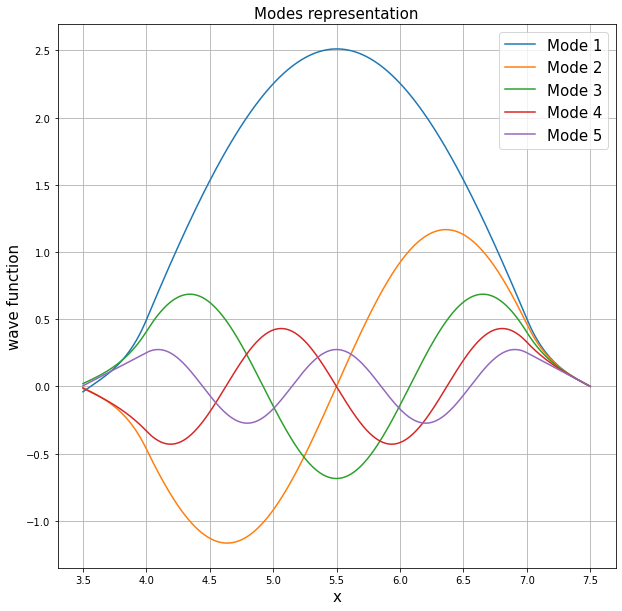

In [15]:
#plt.plot(x,V(x)[0])
plt.figure(figsize=(10,10))
plt.xlabel('x', fontsize=15)   
plt.ylabel('wave function',fontsize=15 )
plt.title('Modes representation', fontsize=15)
plt.grid()

plt.plot(x,numerovR(h,V(x)[0],C[0],V(x)[1][0])[0], label='Mode 1' )
plt.plot(x,numerovR(h,V(x)[0],C[1],V(x)[1][0])[0], label='Mode 2' )
plt.plot(x,numerovR(h,V(x)[0],C[4],V(x)[1][0])[0], label='Mode 3' )
plt.plot(x,numerovR(h,V(x)[0],C[9],V(x)[1][0])[0], label='Mode 4' )
plt.plot(x,numerovR(h,V(x)[0],C[17],V(x)[1][0])[0], label='Mode 5')


plt.legend(fontsize= 15)
plt.show()   


#### Quad

In [16]:
VQuad(x)[1]

1000.0

In [17]:
K=AMP(VQuad(x)[0], h, int(VQuad(x)[1]) ) 
K

[-8.553706936694708,
 -8.551706537504648,
 -8.549706138314589,
 -8.54770573912453,
 -8.54570533993447,
 -8.54370494074441,
 -8.54170454155435,
 -8.539704142364291,
 -8.537703743174232,
 -8.53570334398417,
 -8.533702944794111,
 -8.531702545604052,
 -8.529702146413992,
 -8.527701747223933,
 -8.525701348033873,
 -8.523700948843814,
 -8.521700549653755,
 -8.519700150463695,
 -8.517699751273636,
 -8.515699352083576,
 -8.513698952893517,
 -8.511698553703457,
 -8.509698154513398,
 -8.507697755323338,
 -8.505697356133279,
 -8.50369695694322,
 -8.50169655775316,
 -8.499696158563099,
 -8.49769575937304,
 -8.49569536018298,
 -8.49369496099292,
 -8.491694561802861,
 -8.489694162612802,
 -8.487693763422742,
 -8.485693364232683,
 -8.483692965042623,
 -8.481692565852564,
 -8.479692166662504,
 -8.477691767472445,
 -8.475691368282385,
 -8.473690969092326,
 -8.471690569902265,
 -8.469690170712205,
 -8.467689771522146,
 -8.465689372332086,
 -8.463688973142027,
 -2.5825153543669,
 -2.5805149551768407,
 -2

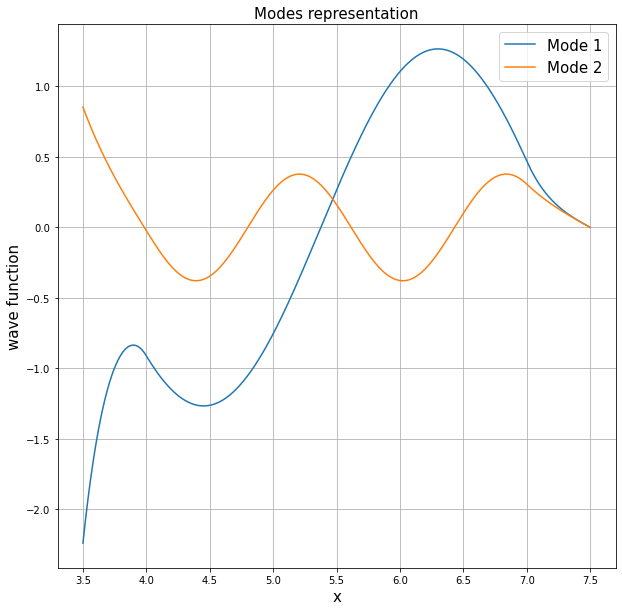

In [18]:
#plt.plot(x,V(x)[0])
plt.figure(figsize=(10,10))
plt.xlabel('x', fontsize=15)   
plt.ylabel('wave function',fontsize=15 )
plt.title('Modes representation', fontsize=15)
plt.grid()

plt.plot(x,numerovR(h,V(x)[0],K[0],V(x)[1][0])[0], label='Mode 1' )
plt.plot(x,numerovR(h,V(x)[0],K[52],V(x)[1][0])[0], label='Mode 2' )


plt.legend(fontsize= 15)
plt.show()   


#### test du respect du produit scalaire 

In [ ]:
trapeze= integrate.trapz( numerovR (h,V(x)[0],C[0],V(x)[1][0]) [0] * numerovR (h,V(x)[0],C[1],V(x)[1][0]) [0] ,x, h) 
trapeze

In [ ]:
trapeze= integrate.trapz( numerovR (h,V(x)[0],C[3],V(x)[1][0]) [0] * numerovR (h,V(x)[0],C[4],V(x)[1][0]) [0] ,x, h) 
trapeze

#### Normalisation 

In [ ]:
 
Nor=[]
   
Nor.append(integrate.trapz( numerovR (h,V(x)[0],C[0],V(x)[1][0]) [0]*numerovR (h,V(x)[0],C[0],V(x)[1][0]) [0],x,h)       )
Nor.append(integrate.trapz( numerovR (h,V(x)[0],C[1],V(x)[1][0]) [0]*numerovR (h,V(x)[0],C[1],V(x)[1][0]) [0],x,h)       )
Nor.append(integrate.trapz( numerovR (h,V(x)[0],C[4],V(x)[1][0]) [0]*numerovR (h,V(x)[0],C[4],V(x)[1][0]) [0],x,h)       )    
Nor.append(integrate.trapz( numerovR (h,V(x)[0],C[9],V(x)[1][0]) [0]*numerovR (h,V(x)[0],C[9],V(x)[1][0]) [0],x,h)       )
Nor.append(integrate.trapz( numerovR (h,V(x)[0],C[17],V(x)[1][0]) [0]*numerovR (h,V(x)[0],C[17],V(x)[1][0]) [0],x,h)       )

Nor

In [ ]:
#plt.plot(x,V(x)[0])
plt.figure(figsize=(10,10))
plt.xlabel('x', fontsize=15)   
plt.ylabel('wave function',fontsize=15 )
plt.title('Modes representation', fontsize=15)
plt.grid()

plt.plot(x,numerovR(h,V(x)[0],C[0],V(x)[1][0])[0]/Nor[0]  , label='Mode 1' )

plt.plot(x,numerovR(h,V(x)[0],C[1],V(x)[1][0])[0]/Nor[1] , label='Mode 2' )

plt.plot(x,numerovR(h,V(x)[0],C[4],V(x)[1][0])[0]/Nor[2]  , label='Mode 3' )

plt.plot(x,numerovR(h,V(x)[0],C[9],V(x)[1][0])[0]/Nor[3]  , label='Mode 4' )

plt.plot(x,numerovR(h,V(x)[0],C[17],V(x)[1][0])[0]/Nor[4]  , label='Mode 5')


plt.legend(fontsize= 15)
plt.show()   